# **Computación numérica**

## Errores y aproximaciones de funciones

*Autores: Blanca Blanca Cano Camarero, Iker Villegas Labairu y Daniel Beteta Francisco*

# **Librerías utilizadas**

In [ ]:
import matplotlib.animation as animation
import numpy as np

from matplotlib import pyplot as plt

from IPython.display import clear_output
from functools import reduce 
from time import sleep 
from math import log2, sqrt
from sympy import *

# **Apartado 1: Errores**

**1. Dado que el redondeo en base 10 de la suma o producto de dos números es ∓0,5 ∗ 𝜀, donde 𝜀 es el valor la última cifra significativa y que el dígito eliminado es aleatorio ¿podemos suponer que el redondeo es una variable aleatoria uniforme?**

Aunque a priori pueda parecer contraintuitivo, la respuesta es que no. Desarrollaremos con más profundidad la justificación más adelante.

**2. Si dibujo la gráfica de función de densidad del error por redondeo ¿Como debería ser dicha gráfica?**

Intuitivamente puede verse como unos dientes de sierra centrado en cero y que oscilan entre −0,5 ∗ 𝜀 y +0,5 ∗ 𝜀. Esto se debe a que los valores que no se pueden representar se redondean al más cercano que sí lo es. 

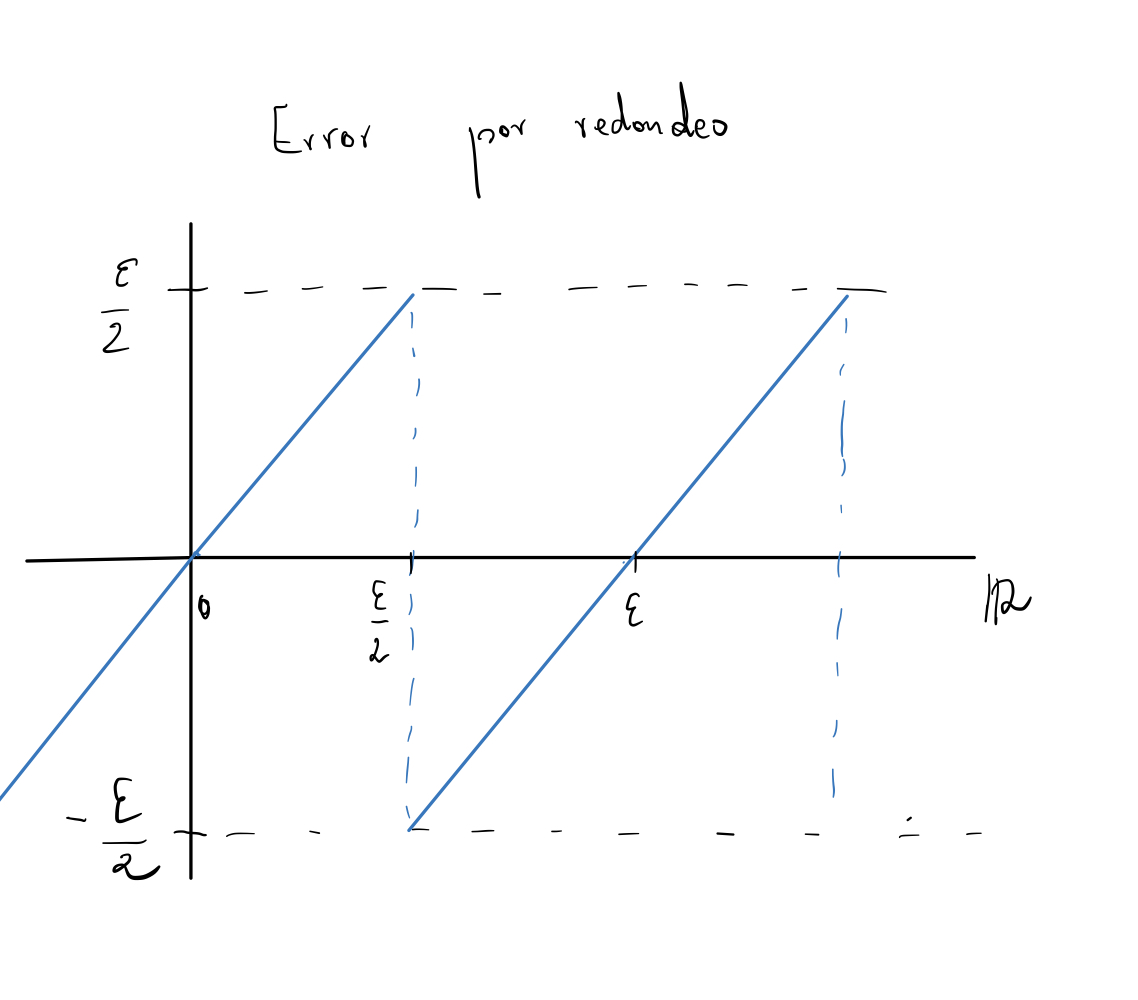

**3. Si asumimos que el error de redondeo es una variable aleatoria uniforme entre −0,5 ∗ 𝜀 y ∓0,5 ∗ 𝜀 ¿Cuál debería ser error absoluto promedio de la suma (o el producto) de un número elevado de números en coma flotante?, da una respuesta razonada**

El error absoluto promedio tanto para la suma de un número es la suma de los errores absolutos, puesto que siguen una distribución uniforme $[−0,5 ∗ 𝜀 , 0,5 ∗ 𝜀 ]$ su esperanza será cero. 

Es decir podemos pensar que los errores de uno se van a compensar con los errores otros. 

## Ejercicio 1

In [ ]:
def get_graphic(function, title=False, step_bias=1.606, step=2**-52, 
                y_lim_parameters=(8.7523765807784,8.7523765807786), 
                x_lim_parameters = None, 
                amount_of_iterations = 800,
                ):
    """
    Plotting function
    """
  
    x = [ step_bias + i*step for i in range(amount_of_iterations) ]
    y = list(map(function, x))

    plt.plot(x, y,'b.')
    if x_lim_parameters:
      plt.xlim(x_lim_parameters)
    plt.ylim(y_lim_parameters)
    plt.xlabel("x")
    plt.ylabel("f(x)")
    if title:
        plt.title(title, loc='right')
    plt.show()


### Apartado a

In [ ]:
def function_a(x: float) -> float:
  num = 4 * x**4 - 59 * x**3 + 324 * x**2 - 751*x + 622
  den = x**4 - 14 * x**3 + 72 * x**2 - 151*x + 112
  return num / den

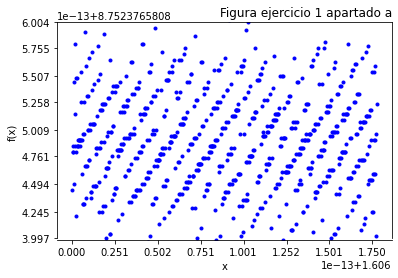

In [ ]:
get_graphic(function_a, title='Figura ejercicio 1 apartado a')

**¿Sale una figura continua? ¿Por qué? ¿Puedes explicar el patrón que sale? ¿Qué
consecuencias puedes sacar sobre el redondeo?**

Notemos primero que $f_a(x)$ es una función continua en el intervalo en que se nos pide representarlo: 

In [ ]:
amount_of_iterations = 800
step_bias = 1.606
step = 2**-52
x = [step_bias + i*step for i in range(amount_of_iterations)]
print(f"El intervalo es [{x[0]},{x[1]}]")

El intervalo es [1.606,1.6060000000000003]


Ya que las raíces del denominador son las siguientes y como vemos no hay ninguna solución real en tal intervalo.

In [ ]:
np.roots([1,-14,72,-151,112]) 

array([5.07672837+1.82253504j, 5.07672837-1.82253504j,
       1.92327163+0.3879571j , 1.92327163-0.3879571j ])

Por tratarse entonces de una función continua, la imagen de un intervalo debería de ser un intervalo, sin embargo dicha situación no es el caso por los siguientes dos motivos: 

1. **Precisión de la arquitectura de 64 bits.** Nótese que el rango parte de 1.606 y se incrementa en saltos de $2^{-52}$, ya que es imposible plasmar la continuidad; para arquitecturas de 64 bits en el sistema de representación IEEE $2^{-52}$ es el menor valor positivo posible.

Si la representación de la imagen fuera perfecta entonces puntos muy próximos deberían de tener la misma imagen, esto se contradice en los puntos que aparece prácticamente *en vertical*. 

2. **Redondeo de la imagen de la función**.
Puede observarse que los saltos de la imagen son del orden de $10^{-13}$ la misma magnitud que el dominio, luego los puntos verticales se producen por los múltiples errores de redondeo que se cometen.

### Apartado b

In [ ]:
def function_b(x: float) -> float:
  num = 622 + x * (-751 + x * (324 + x * (-59 + 4 * x)))
  den = 112 + x * (-151 + x * (72 + x * (-14 + x)))
  return num / den

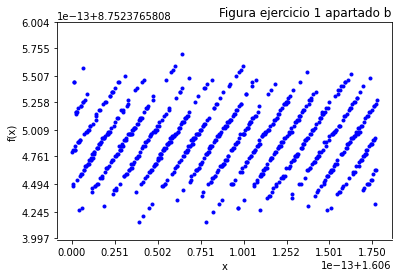

In [ ]:
get_graphic(function_b, title='Figura ejercicio 1 apartado b')

**¿Observas alguna diferencia con la gráfica anterior?**

Notemos que estamos ante la misma función escrita de manera equivalente y que sin embargo ahora el rango de la imagen es menor para la formulación con la segunda expresión. 

In [ ]:
y_a = list(map(function_a, x))
min_y_a = reduce(min, y_a,10)
max_y_a = reduce(max, y_a,-10)

y_b = list(map(function_b, x))
min_y_b = reduce(min, y_b,10)
max_y_b = reduce(max, y_b,-10)

print(f"El rango de valores de la función a es [{min_y_a},{max_y_a}] con una variación de {max_y_a - min_y_a}")
print(f"El rango de valores de la función b es [{min_y_b},{max_y_b}] con una variación de {max_y_b - min_y_b}")

El rango de valores de la función a es [8.75237658077838,8.752376580778607] con una variación de 2.2737367544323206e-13
El rango de valores de la función b es [8.752376580778416,8.75237658077857] con una variación de 1.545430450278218e-13


Esto es debido a que el número de operaciones realizadas para la función b es menor, reduciendo con ello el error por redondeo. 

Operaciones para la función **a**: 
(La potencia $n$-ésima se contará como $n$ multiplicaciones). 
- Productos y multiplicaciones : $2(5+4+3+2) +1 = 2 \times 14 +1 = 29$.
- Sumas y restas :$2 \times 4 = 8$.
Haciendo un total de $37$ operaciones.

Operaciones para la función **b**: 
- Productos y multiplicaciones : $2 \times 4 +1  = 9$.
- Sumas y restas :$2 \times 4 = 8$.
Haciendo un total de $17$ operaciones.

### Apartado c

In [ ]:
def function_c(x: float) -> float:
  num = 3*(x - 2)*((x - 5)**2 + 4)
  den = x + (x - 2)**2*((x - 5)**2 + 3)
  return 4 - num / den

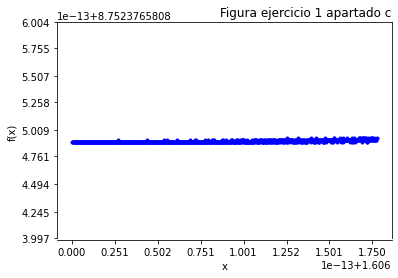

In [ ]:
get_graphic(function_c, title='Figura ejercicio 1 apartado c')

**¿Observas alguna diferencia con las gráficas anteriores?**

La función vuelve a ser la misma y sin embargo ahora el error por redondeo es el que se esperaría por continuidad: la imagen un intervalo muy pequeño por ser la preimagen de un intervalo muy pequeño.

Si comparamos el número de operaciones podemos apreciar que:

Operaciones para la función b: 
- Productos y multiplicaciones: $2 \times 4 +1  = 9$
- Sumas y restas: $2 \times 4 = 8$
Haciendo un total de $17$ operaciones.

Operaciones para la función c: 
- Productos y multiplicaciones: $(4+5+1) = 10$
- Sumas y restas: $3+4+1$
Haciendo un total de $18$ operaciones.

Establecemos por tanto la hipótesis de que el número de operaciones no lo es todo a la hora de determinar el error, sino que también es importante la simplificación de la función. 

Si nos  fijamos en **b**, en una sola fracción se está determinando el valor de la función con dominio en los valores *más pequeños* que pueden representarse, y que al operarse necesitan ser redondeados por limitaciones de precisión. 

Mientras que en el apartado **c** la parte numérica, que depende de la variable aleatoria, es menor, ya que ahora su expresión es cuatro más una fracción. El cuatro se representa exactamenten en IEEE y el segundo sumando, que será redondeado, *tiene menor peso*.  

### Cuestiones

**1. ¿Las tres funciones que hemos pintado son la misma función, solo que escrita de diferente manera? Da una respuesta razonada.**

Las tres funciones son la misma. 

Se tine que $f_a = f_b$ ya que basta con aplicar la propiedad distributiva de la suma y el producto. 

Para ver la igualdad de $f_c$ vamos a valernos del comando `simplify` de la biblioteca  sympy 
(Ver [documentación simplify](https://docs.sympy.org/latest/tutorials/intro-tutorial/simplification.html) consultada por última vez el 25 de septiembre de 2022). 

In [ ]:
x = symbols('x')
simplify(function_a(x))

(4*x**4 - 59*x**3 + 324*x**2 - 751*x + 622)/(x**4 - 14*x**3 + 72*x**2 - 151*x + 112)

In [ ]:
simplify(function_c(x))

(4*x**4 - 59*x**3 + 324*x**2 - 751*x + 622)/(x**4 - 14*x**3 + 72*x**2 - 151*x + 112)

Podemos observar que ambas expresiones son iguales. 

**2. ¿Podemos afirmar ahora que la distribución del error por redondeo es una variable aleatoria uniforme?**

No, puesto que de serlo la imagen de la función sería una banda horizontal en todas las gráficas mientras que en las figuras de la sepresentación de las funciones $a$ y $b$ son semejantes a la sección de hiperplanos separados por la precisión (underflow).

**3. Comenta los resultados obtenidos.**


Como ya hemos ido observando durante el desarrollo de la práctica, la conclusión obtenida es que la formulación de la expresión a calcular es determinante para aliviar los errores por redondeo. 

Como heurística obtenida:

1. Tener el máximo de sumandos o productos constantes (no dependientes de la entrada) posibles que no dependan. 
2. Reducir el número de operaciones. 

## Ejercicio opcional


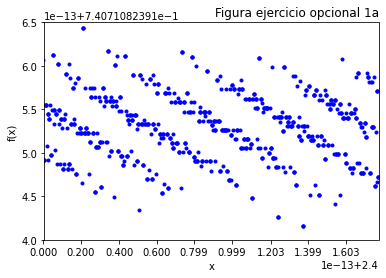

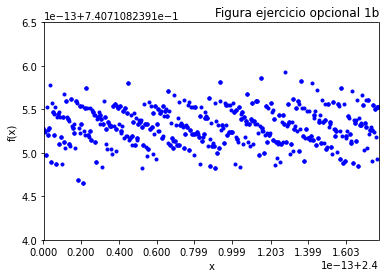

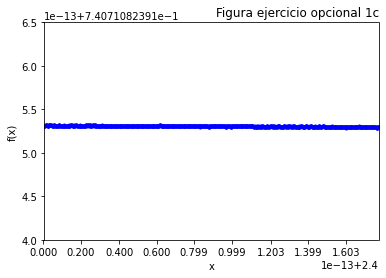

In [ ]:
# optional parameters
optional_step_bias = 2.4
optional_step = 2**-52
optional_y_lim_parameters=(.7407108239094,.74071082390965)


amount_of_iterations = 800
x = [ optional_step_bias + i*optional_step for i in range(amount_of_iterations) ]
optional_x_lim_parameters = (min(x), max(x))

get_graphic(
    function_a, title='Figura ejercicio opcional 1a', step_bias=optional_step_bias, 
    step=optional_step, y_lim_parameters=optional_y_lim_parameters,
    x_lim_parameters=optional_x_lim_parameters
)

get_graphic(
    function_b, title='Figura ejercicio opcional 1b', step_bias=optional_step_bias, 
    step=optional_step, y_lim_parameters=optional_y_lim_parameters,
    x_lim_parameters=optional_x_lim_parameters
)

get_graphic(
    function_c, title='Figura ejercicio opcional 1c', step_bias=optional_step_bias, 
    step=optional_step, y_lim_parameters=optional_y_lim_parameters,
     x_lim_parameters=optional_x_lim_parameters
)

**¿Qué cambio has observado? ¿Podrías explicar por qué ha cambiado la dirección del patrón?**

Como podemos ver lo que ha cambiado es la dirección del patrón. 

Esto se debe a que la función evaluada en el rango de $1.606$ era creciente, luego los errores, aunque redondeados tienden a *crecer*. 

En el rango de $2.5$ la función es decreciente entonces la dirección de los saltos ha cambiado, tiene una tendencia a redondear hacia abajo.  

Puede apreciarse intuitivamente en la siguiente gráfica: 

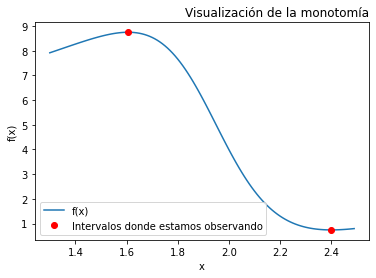

In [ ]:

x = list(np.arange(1.3, 2.5, 0.01))
y = list(map(function_c, x))
x_2 = [1.606 , 2.4]
y_2 = list(map(function_c, x_2))
plt.plot(x, y, label = 'f(x)')
plt.plot(x_2, y_2, 'ro', label='Intervalos donde estamos observando')
plt.legend()
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title('Visualización de la monotomía', loc='right')
plt.show()


Veamos numericamente que, en efecto, se da tal situación. 

La derivada es: 


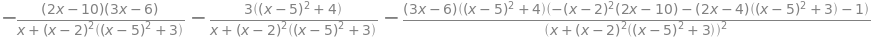

In [ ]:
x= symbols('x')
init_printing(use_unicode=True)

derivative = diff(function_c(x), x)
print('La derivada es: ')
derivative


In [ ]:
# Evaluamos la derivada 

for i in [1.606, 1.60600007, 2.4, 2.40001]:
  print(f"f'({i}) = {derivative.evalf(subs={x: i})}")


f'(1.606) = 0.0121684902287851
f'(1.60600007) = 0.0121658253430773
f'(2.4) = -0.0110837872330445
f'(2.40001) = -0.0109158720154359


Vemos que para nuestro intervalo de $1.606$ la derivada toma valores positivos, luego es creciente, 
mientras que para $2.4$ toma valores negativos luego es decreciente. 

Mostramos ahora un ejemplo para menos puntos y, así, poder apreciar si es creciente o decreciente. 

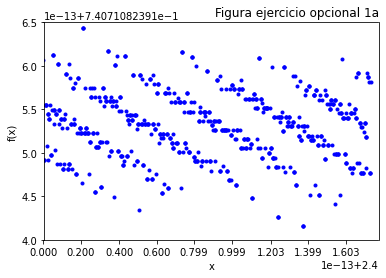

In [ ]:
# Para poder ver cómo surgen los puntos ejecute la función 
amount_of_iterations = 800
x = [ optional_step_bias + i*optional_step for i in range(amount_of_iterations) ]
optional_x_lim_parameters = (min(x), max(x))


for n in range(1,amount_of_iterations, 20):
  clear_output(wait=True)
  get_graphic(
    function_a, title='Figura ejercicio opcional 1a', step_bias=optional_step_bias, 
    step=optional_step, y_lim_parameters=optional_y_lim_parameters,
    x_lim_parameters=optional_x_lim_parameters,
    amount_of_iterations = n
  )
  sleep(0.001)


Si disminuimos el dominio, entonces las pendientes de las bandas de puntos, visualmente serán menor, es decir, las bandas se verán más horizontales, notándose claramente los errores de precisión. 


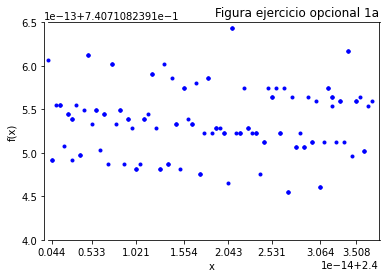

In [ ]:
amount_of_iterations = 170
x = [ optional_step_bias + i*optional_step for i in range(amount_of_iterations) ]
optional_x_lim_parameters = (min(x), max(x))


for n in range(1,amount_of_iterations, 5):
  clear_output(wait=True)
  get_graphic(
    function_a, title='Figura ejercicio opcional 1a', step_bias=optional_step_bias, 
    step=optional_step, y_lim_parameters=optional_y_lim_parameters,
    x_lim_parameters=optional_x_lim_parameters,
    amount_of_iterations = n
  )
  sleep(0.001)

# **Apartado 2: Aproximación de funciones**

**1. ¿Dado un conjunto de $n$ puntos, existe siempre un polinomio de grado $m < n-1$ que pase por dichos puntos?**

Esto no es así ya que si tomamos un conjunto de 3 puntos no alineados, es decir, $n = 3$, no existe nigún polinomio de grado 1 ($m < 3-1 = 2$) 
que pase por dichos puntos.

**2. ¿Se te ocurre una manera en la cual el cálculo de los valores singulares de una matriz permita calcular un polinomio de regresión adecuado?**

Planteando dicho polinomio de regresión de forma matricial, y aplicando, a la matriz que contiene los datos de entrada, una descomposición en valores singulares. Así, se podría establecer un método a partir del cuál pudieramos hallar dicho polinomio utilizando los valores singulares de la matriz.


**3. ¿Como podrías transformar el problema de encontrar un polinomio de regresión en un problema de producto de matrices?**

El polinomio de regresión lo podemos plantear de la siguiente forma matricial $y = Xa$ donde $X$ es una matriz donde se almacenan los datos de entrada a partir de los cuales queremos hayar la estimación, $y$ un vector que contiene las variables respuesta y $a$ otro vector con los coeficientes de nuestro polinomio.

**4. ¿Crees que, además, es posible calcular el error de regresión a partir de los valores singulares?**

Para hallar el error de regresión, dada la descomposición $Xa = y$, recurriremos al cálculo de $\Vert Xa - y \Vert_2$. La matriz $X$ la podemos descomponer como un producto de matrices $X=U\Sigma V$ donde $U$ y $V$ son matrices unitarias, y $\Sigma$ la matriz diagonal donde se almacenan los valores singulares. Luego, a apriori, se podría utilizar esta descomposición, para facilitar los cálculos de los errores, interviniendo, de esta manera, los valores singulares. En los siguientes ejercicios, veremos si esto se cumple.  

## Ejercicio 1


El objetivo es aproximar los datos mediante un polinomio cuadrático de la forma $P_2(x) = a_0 + a_1x + a_2x^2$. Para ello definiremos una matriz $X$ 5 x 3 con los valores de $x^j$ en cada columna para todo $j \in \{0,1,2\}$, un vector $a$ columna 3 x 1 que almacene los valores de  $ a_0,a_1,a_2$ y otro vector columna 3 x 1 $y$ con los datos respuesta. De este modo, en base a los datos dados, definimos:

$$
X = 
\left( \begin{array}{ccc}
1.0000 & 0.0000 & 0.0000\\
1.0000 & 0.2500& 0.0625\\
1.0000 & 0.5000& 0.2500\\
1.0000 & 0.7500& 0,5625\\
1.0000 & 1.0000& 1.0000\\
\end{array}\right)
\hspace{1.5 cm}
y = \left(
\begin{array}{c}
1.0000 \\
1.2840 \\
1.6487 \\
2.1170 \\
2.7183 \\
\end{array}
\right)
$$

y el vector de los coeficientes:

$$
a = \left(
\begin{array}{c}
a_1\\a_2\\a_3
\end{array}
\right)
$$

Nuestro objetivo será determinar $a_1,a_2,a_3$ que den la mejor aproximación del polinomio a los valores de $y_i$ para todo $i \in \{1,2,3,4,5\}$.

### Apartado a

Comenzamos planteando el problema de regresión como un problema de interpolación sobredimensionado de la forma **$Xa = y$**, tal y como hemos definido anteriormente.

In [ ]:
X = np.array([[1,0,0], [1,0.25,0.25**2], [1,0.5,0.5**2], [1,0.75,0.75**2], [1,1,1]])
X_np = np.vander([0.0, 0.25, 0.5, 0.75, 1.0], N=3, increasing=True)
y = np.array([[1,1.2840,1.6487,2.1170,2.7183]]).T

print(f"X={X}\n y={y}\n")
print(f"¿Es X la matriz de Vandermonde? {(X==X_np).all()}")

X=[[1.     0.     0.    ]
 [1.     0.25   0.0625]
 [1.     0.5    0.25  ]
 [1.     0.75   0.5625]
 [1.     1.     1.    ]]
 y=[[1.    ]
 [1.284 ]
 [1.6487]
 [2.117 ]
 [2.7183]]

¿Es X la matriz de Vandermonde? True


Además hemos comprobado que la matriz $X$ se corresponde con una matriz de Vandermonde.

### Apartado b

En este apartado vamos a realizar la descomposición en valores singulares de $X$, de modo que $X = USV^t$ siendo $U$ una matriz unitaria 5 x 5, $V$ otra matriz unitaria 3 x 3 y $S$ una matriz diagonal 5 x 3 con los valores singulares de $X$ almacenados de la siguiente forma:


$$
S = 
\left( \begin{array}{ccc}
\sigma_1 & 0 & 0\\
0 & \sigma_2 & 0 \\
0 & 0 & \sigma_3 \\
0 & 0 & 0\\
0 & 0 & 0\\
\end{array} \right)
$$
denotando $\sigma_1,\sigma_2,\sigma_3$ como los valores singulares de $X$.

De este modo, procedemos a realizar la descomposición:

In [ ]:
u, s, vh = np.linalg.svd(X)
smat = np.zeros((5, 3))
smat[:3, :3] = np.diag(s)
print(f"u\n{u}\n s\n{smat}\n vh\n{vh}")

u
[[-0.29454913  0.63267484  0.63140925 -0.02576091 -0.33707876]
 [-0.346616    0.45500901 -0.21036331  0.28091869  0.74138797]
 [-0.41593037  0.19422733 -0.52439676 -0.68819061 -0.20169135]
 [-0.50249224 -0.14967019 -0.3106911   0.63666879 -0.47246617]
 [-0.60630161 -0.57668356  0.43075367 -0.20363596  0.26984831]]
 s
[[2.71168512 0.         0.        ]
 [0.         0.93707467 0.        ]
 [0.         0.         0.16268803]
 [0.         0.         0.        ]
 [0.         0.         0.        ]]
 vh
[[-0.7987245  -0.4712162  -0.37415833]
 [ 0.59286357 -0.51017309 -0.62308604]
 [ 0.10272272 -0.71949893  0.68685467]]


Vemos que nos queda lo siguiente:

$$
U = 
\left( \begin{array}{ccccc}
 -0.29454913 & 0.63267484 & 0.63140925 & -0.02576091 & -0.33707876\\
 -0.346616  &  0.45500901 & -0.21036331 & 0.28091869 & 0.74138797\\
 -0.41593037 & 0.19422733 & -0.52439676 & -0.68819061 & -0.20169135\\
 -0.50249224 &-0.14967019 & -0.3106911 &  0.63666879 & -0.47246617\\
 -0.60630161 & -0.57668356 & 0.43075367 & -0.20363596 & 0.26984831
\end{array}\right)
$$

$$
S = 
\left( \begin{array}{ccc}
 2.71168512 & 0.00000000 & 0.00000000 \\
 0.00000000  &  0.93707467 & 0.00000000 \\
 0.00000000 & 0.00000000 & 0.16268803 \\
0.00000000 &0.00000000 & 0.00000000 \\
 0.00000000 & 0.00000000 & 0.00000000 
\end{array}\right)
\hspace{2 cm}
V = 
\left( \begin{array}{ccc}
-0.79872450 &  0.59286357 &  0.10272272\\
-0.47121620 & -0.51017309 & -0.71949893\\
-0.37415833 & -0.62308604 &  0.68685467
 \end{array}\right)
$$

## Ejercicio 2

Utilizando la descomposición utilizada en el anterior ejercicio $X=USV^t$ y que al ser $U$ y $V$ matrices unitarias reales que cumplen $U^t=U^{-1}$ y $V^t=V^{-1}$, nos queda:

$$
a = X^{-1}y = (USV^t)^{-1}y = VS^{-1}U^ty = VS^{-1}c
$$

donde hemos denotado $c=U^ty$.

Por otro lado al ser 

$$
S^{-1}=
\left( \begin{array}{ccccc}
 \sigma_1^{-1} & 0 & 0 & 0 & 0 \\
 0 &   \sigma_2^{-1} & 0 & 0 & 0 \\
 0 & 0&  \sigma_3^{-1}& 0 & 0 \\
 \end{array}\right)
$$

llamamos 

$$
z=S^{-1}c = 
\left( \begin{array}{c}
 c_1/\sigma_1 \\
 c_2/\sigma_2\\
 c_3/\sigma_3\\
 \end{array}\right)
$$

Por lo tanto, podremos establecer la siguiente descomposición

$$
a = Vz.
$$

De este modo, comenzamos calculando el valor de $z$:


In [ ]:
c = (u.T.dot(y))
z = (c[:3].T/s).reshape(3,1)

print(f'c:{c[:3]}\n')
print(f'z:{z}\n')

c:[[-4.1372342 ]
 [-0.3473217 ]
 [ 0.00991447]]

z:[[-1.52570598]
 [-0.37064463]
 [ 0.06094163]]



Ahora procedemos a sacar el valor de $a$ a partir de la descomposición $a=Vz$ siendo:

$$
V = 
\left( \begin{array}{ccc}
-0.79872450 &  0.59286357 &  0.10272272\\
-0.47121620 & -0.51017309 & -0.71949893\\
-0.37415833 & -0.62308604 &  0.68685467
\end{array}\right)
\hspace{2 cm}
z=
\left( \begin{array}{c}
-1.52570598\\
-0.37064463\\
 0.06094163\\
 \end{array}\right)
$$

In [ ]:
a = vh.T.dot(z)
print(f'a:{a}\n')

a:[[1.00513714]
 [0.86418286]
 [0.84365714]]



Y tenemos que el valor de $a$ es
$$
a = 
\left( \begin{array}{c}
1.00513714\\
 0.86418286\\
 0.84365714
 \end{array}\right).
$$

Comprobemos que el cálculo ha sido correcto comparando $y$ con el producto $Xa$ correspondiente al polinomio de aproximación.

In [ ]:
X.dot(a)

array([[1.00513714],
       [1.27391143],
       [1.64814286],
       [2.12783143],
       [2.71297714]])

Comparando con el vector $y$, vemos que el resultado se aproxima bastante bien, aunque se aprecia un cierto error.

## Ejercicio 3

Por definición, el error de la aproximación que acabamos de calcular será $$
\Vert Xa-y \Vert_2 = \sqrt{\sum_{i=1}^5\left(P_2(x_i)-y_i\right)^2}.
$$

Por otro lado, usando $Vz=a$, $Uc = y$ y la descomposición $X=USV^t$, vemos que

$$
\Vert Xa-y \Vert_2 = \Vert XVz-Uc \Vert_2 = \Vert USV^tVz-Uc \Vert_2 = \Vert USz-Uc \Vert_2 = \Vert U(Sz-c) \Vert_2.
$$

Al tratarse $U$ de una matriz unitaria, sabemos que se preserva la norma, es decir, que para todo vector complejo $w$, $\Vert Uw \Vert_2 = \Vert w \Vert_2$. De este modo,

$$
\Vert Xa-y \Vert_2 =  \Vert U(Sz-c) \Vert_2 = \Vert Sz-c \Vert_2.
$$

Además,

$$
Sz = 
\left( \begin{array}{ccc}
\sigma_1 & 0 & 0\\
0 & \sigma_2 & 0 \\
0 & 0 & \sigma_3 \\
0 & 0 & 0\\
0 & 0 & 0\\
\end{array} \right)
\left( \begin{array}{c}
 c_1/\sigma_1 \\
 c_2/\sigma_2\\
 c_3/\sigma_3\\
 \end{array}\right)
=
\left( \begin{array}{c}
 c_1 \\
 c_2\\
 c_3\\
 0\\
 0\\
 \end{array}\right)
$$

luego 

$$
Sz - c = 
\left( \begin{array}{c}
 c_1 \\
 c_2\\
 c_3\\
 0\\
 0\\
 \end{array}\right)
 -
 \left( \begin{array}{c}
 c_1 \\
 c_2\\
 c_3\\
 c_4\\
 c_5\\
 \end{array}\right)
 =
  \left( \begin{array}{c}
 0 \\
 0\\
 0\\
 -c_4\\
 -c_5\\
 \end{array}\right)
$$

Y podemos concluir que,

$$
\Vert Xa-y \Vert_2 =  \Vert Sz-c \Vert_2 = \sqrt{c_4^2+c_5^2}.
$$

Definiendo $E := \sqrt{c_4^2+c_5^2}$, comprobemos que equivale al error manual a partir de nuestro ejemplo:

In [ ]:
def P_2(x: np.array, a: np.array) -> np.array:
  pol_x = []
  for element in x:
    pol_x.append(np.array([a[0][0]+a[1][0]*element[0] + a[2][0]*element[0]**2]))
  return np.array(pol_x)

In [ ]:
E = sqrt(c[3][0]**2+c[4][0]**2)

x = np.array([[0,0.25,0.5,0.75,1]]).T
dif = (P_2(x,a)-y)**2
E_manual = sqrt(np.sum(dif))

print(f'E = {E}\n')
print(f'El error manual de la aproximación es {E_manual}')

E = 0.0165569493394334

El error manual de la aproximación es 0.0165569493394335


Observando ambos errores, tal y como hemos demostrado antes, valen lo mismo.

De este modo, también podemos establecer que los valores singulares no intervienen en el cálculo del error de la aproximación polinómica, ya que hemos visto que $E = \sqrt{c_4^2 + c_5^2}$. Como los valores de $c_4$ y $c_5$ vienen del producto $c = U^ty$, vemos que ni $\sigma_1,\sigma_2, \sigma_3$ intervienen en su cálculo.

## Ejercicio opcional

**1. ¿Qué obtenemos cuando aplicamos el método de los apartados 1 y 2 a la construcción de un polinomio de grado 4?**


Para responder a esta pregunta, vamos a realizar el mismo procedimiento que hemos aplicado en los ejercicios anteriores, pero ahora aplicado a un polinomio de grado cuatro $P_4(x) = a_0 + a_1x + a_2x^2 + a_3x^3 + a_4x^4$ para todo $a_j$ real con $j\in\{0,1,2,3,4\}$.

Redefinimos la matriz $X$ como una matriz 5 x 5 de la siguiente forma,

$$
X = 
\left( \begin{array}{ccccc}
1&0&0&0&0\\
1&0.25&0.25^2&0.25^3&0.25^4\\
1&0.5&0.5^2&0.5^3&0.5^4\\
1&0.75&0.75^2&0.75^3&0.75^4\\
1 & 1 & 1 & 1 & 1
\end{array} \right)
$$

In [ ]:
X_4 = np.array([[1,0,0,0,0], [1,0.25,0.25**2,0.25**3,0.25**4], [1,0.5,0.5**2,0.5**3,0.5**4], [1,0.75,0.75**2,0.75**3,0.75**4], [1,1,1,1,1]])

u_4, s_4, vh_4 = np.linalg.svd(X_4)
smat_4 = np.zeros((5, 5))
smat_4[:5, :5] = np.diag(s_4)
print(f"u\n{u_4}\n s\n{smat_4}\n vh\n{vh_4}")


u
[[-0.23136843 -0.56014795  0.63927512 -0.44514109 -0.16087157]
 [-0.27818994 -0.49480826  0.03026585  0.61199904  0.54983297]
 [-0.3558808  -0.34389454 -0.45640314  0.21766116 -0.70668607]
 [-0.48857455 -0.02731584 -0.50512248 -0.58374068  0.40576699]
 [-0.7097343   0.5677935   0.35631272  0.19793187 -0.08804538]]
 s
[[2.98659464 0.         0.         0.         0.        ]
 [0.         1.23790316 0.         0.         0.        ]
 [0.         0.         0.31721696 0.         0.        ]
 [0.         0.         0.         0.05382652 0.        ]
 [0.         0.         0.         0.         0.00435088]]
 vh
[[-6.91003725e-01 -4.43198108e-01 -3.65270378e-01 -3.23004499e-01
  -2.97211934e-01]
 [-6.93408912e-01  2.03293192e-01  3.51828157e-01  4.08393361e-01
   4.32767570e-01]
 [ 2.02788911e-01 -7.66554977e-01 -1.26184421e-01  2.73114937e-01
   5.29863990e-01]
 [-2.39603968e-02  4.07915921e-01 -7.01457823e-01 -2.14830918e-01
   5.42987201e-01]
 [-6.99932542e-04  9.08040962e-02 -4.8459149

De este modo, la descomposición singular de $X$ nos queda de la siguiente forma:

$$
U = 
\left( \begin{array}{ccccc}
-0.23136843 &-0.56014795&  0.63927512& -0.44514109 &-0.16087157\\
-0.27818994& -0.49480826 & 0.03026585 & 0.61199904 & 0.54983297\\
-0.35588080 & -0.34389454 & -0.45640314 & 0.21766116 & -0.70668607\\
-0.48857455 & -0.02731584 & -0.50512248 & -0.58374068 & 0.40576699\\
-0.70973430& 0.56779350 & 0.35631272 & 0.19793187 & -0.08804538
\end{array} \right)
$$

$$
S = 
\left( \begin{array}{ccccc}
2.98659464& 0.00000000&         0.00000000  &       0.00000000 &        0.  0000000 0     \\
 0.00000000       &  1.23790316 & 0. 00000000    &    0. 00000000   &     0.00000000        \\
 0.00000000     &    0.00000000     &   0.31721696 &0.00000000    &     0.00000000        \\
 0.00000000    &     0. 00000000   &     0.00000000    &     0.05382652 & 0.00000000        \\
 0.00000000     &    0.00000000    &     0.00000000    &     0.00000000    &     0.00435088
\end{array} \right)
$$

$$
V = 
\left( \begin{array}{ccccc}
-0.69100373 &-0.69340891& 0.20278891& -0.02396040& -0.00069993\\
 -0.44319812  &0.20329319&-0.76655498&  0.40791592&
   0.09080410\\
 -0.36527038&  0.35182816& -0.12618442 &-0.70145782&
  -0.48459149\\
 -0.323004509 &  0.40839336 & 0.27311494 & -0.21483092 &
   0.77983259 \\
 -0.29721193 &  0.43276757 &  0.52986399 &  0.54298720 &
  -0.38572833 
  \end{array} \right)
$$

Sacamos el valor $z$,

In [ ]:
c_4 = (u_4.T.dot(y))
z_4 = (c_4.T/s_4).reshape(5,1)

print(f'c:{c_4}\n')
print(f'z:{z_4}\n')

c:[[-4.13888805e+00]
 [-2.76855241e-01]
 [-1.75114786e-01]
 [ 1.78280339e-03]
 [-3.24371941e-04]]

z:[[-1.38582183]
 [-0.22364855]
 [-0.55203475]
 [ 0.03312128]
 [-0.07455322]]



Así,

$$
z = 
\left( \begin{array}{c}
-1.38582183\\
-0.22364855\\
-0.55203475\\
 0.03312128\\
-0.07455322
\end{array} \right)
$$

Y procedemos a sacar los valores de $a$,

In [ ]:
a_4 = vh_4.T.dot(z_4)
print(f'a:{a_4}\n')

a:[[1.        ]
 [0.99863333]
 [0.51006667]
 [0.14026667]
 [0.06933333]]



De modo que hemos obtenido los siguientes coeficientes:

$$
a =
\left( \begin{array}{c}
1.00000000\\        
 0.99863333\\
 0.51006667\\
 0.14026667\\
 0.06933333
 \end{array} \right)
$$

Veamos que forma adoptan los polinomios de grado cuatro de nuestra aproximación:

In [ ]:
X_4.dot(a_4)

array([[1.    ],
       [1.284 ],
       [1.6487],
       [2.117 ],
       [2.7183]])

Se puede observar que el error, aumentando el grado del polinomio de interpolación, disminuye. Calculémoslo:

In [ ]:
def P_4(x: np.array, a: np.array) -> np.array:
  pol_x = []
  for element in x:
    pol_x.append(np.array([a[0][0]+a[1][0]*element[0] + a[2][0]*element[0]**2 + a[3][0]*element[0]**3 + a[4][0]*element[0]**4]))
  return np.array(pol_x)

dif_4 = (P_4(x,a_4)-y)**2
E_manual_4 = sqrt(np.sum(dif_4))

print(f'El error manual de la aproximación es {E_manual_4}')



El error manual de la aproximación es 2.86084461159078E-15


Vemos que su valor es prácticamente cero, luego podemos concluir que $P_4$ nos da una mejor aproximación de $y$, que $P_2$, es decir, que aumentando el grado del polinomio obtenemos menos error de aproximación.


**2. Comprueba que, efectivamente el polinomio obtenido se corresponde en este caso a un polinomio de interpolación en lugar de a un polinomio de regresión.**

Un polinomio de interpolación se caracteriza por que pasa por todos los puntos de nuestro sistema, mientras que un polinomio de regresión ofrece una estimación que se asemeje al comportamiento de los datos, donde no necesariamente pase por todos los puntos. De este modo, vamos a evaluar calcular el error de nuestros datos, en todos los punto de nuestro sistema.

In [ ]:
print(np.sqrt(dif_4))

[[2.22044605e-16]
 [2.22044605e-16]
 [4.44089210e-16]
 [8.88178420e-16]
 [2.66453526e-15]]


Tal y como podemos observar, el error es prácticamente despreciable, luego podemos apuntar a que el polinomio pasará por dichos puntos, y por tanto, a que hemos obtenido un polinomio de interpolación.

Fijandonos para el caso donde habíamos hecho una aproximación polinómica cuadrática, el error en los puntos será el siguiente:

In [ ]:
print(np.sqrt(dif))

[[0.00513714]
 [0.01008857]
 [0.00055714]
 [0.01083143]
 [0.00532286]]


Vemos que en este caso el error ya no es tan pequeño, luego no podemos asegurar que nuestro polinomio cuadrático pase por los puntos de $y$. De modo que en este caso no habremos obtenido un polinomio de interpolación.




Consideremos que tengamos un conjunto de datos de tamaño $n$. De esta forma podríamos concluir que, cuando nuestra matriz $X$ sea cuadrada, es decir, que cuando planteemos un polinomio de aproximación de grado $n-1$. Este se corresponderá con un polinomio de interpolación.

